In [1]:
load("/rds/project/bg200/rds-bg200-hphi-gottgens/users/mlnt2/PhD_MT06/7_clusters/workspace.RData")

In [2]:
source("/rds/project/bg200/rds-bg200-hphi-gottgens/users/mlnt2/PhD_MT06/core_functions.R")
load_data(normalise=TRUE)

library(Matrix)
library(umap)
library(reticulate)

Loading required package: Matrix


********************************************************

Note: As of version 1.0.0, cowplot does not change the

  default ggplot2 theme anymore. To recover the previous

  behavior, execute:
  theme_set(theme_cowplot())

********************************************************


Loading required package: scran

Loading required package: SingleCellExperiment

Loading required package: SummarizedExperiment

Loading required package: GenomicRanges

Loading required package: stats4

Loading required package: BiocGenerics

Loading required package: parallel


Attaching package: ‘BiocGenerics’


The following objects are masked from ‘package:parallel’:

    clusterApply, clusterApplyLB, clusterCall, clusterEvalQ,
    clusterExport, clusterMap, parApply, parCapply, parLapply,
    parLapplyLB, parRapply, parSapply, parSapplyLB


The following object is masked from ‘package:Matrix’:

    which


The following objects are masked from ‘package:stats’:

    IQR

In [5]:
normMatrix<-logcounts(sce)

In [ ]:
writeMM(normMatrix, file= "/rds/project/bg200/rds-bg200-hphi-gottgens/users/mlnt2/PhD_MT06/visual/countsData_norm.mtx")

In [ ]:
nrow(normMatrix) # number of genes
ncol(normMatrix) # number of cells in raw matrix

In [ ]:
write.table(tsne$Y, file="/rds/project/bg200/rds-bg200-hphi-gottgens/users/mlnt2/PhD_MT06/visual/tsne.tab",row.names=FALSE, col.names=FALSE)

In [ ]:
rabbit.umap$layout

In [ ]:
write.table(rabbit.umap$layout, file="/rds/project/bg200/rds-bg200-hphi-gottgens/users/mlnt2/PhD_MT06/visual/umap.tab",row.names=FALSE, col.names=FALSE)

In [ ]:
genes <- read.table("/rds/project/bg200/rds-bg200-hphi-gottgens/users/mlnt2/PhD_MT06/2_cellcalling/genes.tsv")

barcodes <- paste0('cell_', 1:ncol(normMatrix))

write.table(barcodes, file="/rds/project/bg200/rds-bg200-hphi-gottgens/users/mlnt2/PhD_MT06/visual/cells.txt", row.names = F, col.names = F, quote = F, sep = "\t")
write.table(genes, file="/rds/project/bg200/rds-bg200-hphi-gottgens/users/mlnt2/PhD_MT06/visual/genes.txt", row.names = F, col.names = F, quote = F, sep = "\t")

In [12]:
pca_sparse<-as(pca, "sparseMatrix")
nrow(pca_sparse)
ncol(pca_sparse)
writeMM(pca_sparse, file="/rds/project/bg200/rds-bg200-hphi-gottgens/users/mlnt2/PhD_MT06/visual/PCAall_20200414.mtx")

[1] 146133

[1] 50

In [35]:
subset_meta<-meta[which(meta$doublet == FALSE & meta$stripped==FALSE),]
nrow(subset_meta)
length(subset_meta$cell)

[1] 146133

[1] 146133

In [18]:
write.table(subset_meta$cell, file="/rds/project/bg200/rds-bg200-hphi-gottgens/users/mlnt2/PhD_MT06/visual/pcaall_cellnames_20200414.tab" , row.names = F, col.names = F, quote = F, sep = "\t")

# Final QC Check (odds and ends)

In [16]:
counts<-counts(sce)
t.matrix<-t(counts)

In [17]:
t.finalMatrix<- t.matrix[which(meta$doublet == FALSE & meta$stripped==FALSE),]

In [18]:
final_Matrix<-t(t.finalMatrix)
ncol(final_Matrix)

[1] 146133

In [19]:
lib.sizes = Matrix::colSums(final_Matrix)

ngenes = Matrix::colSums(final_Matrix > 0)


   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   3501    6923   10126   12326   14811  121907 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
    905    2070    2661    2772    3315    7257 

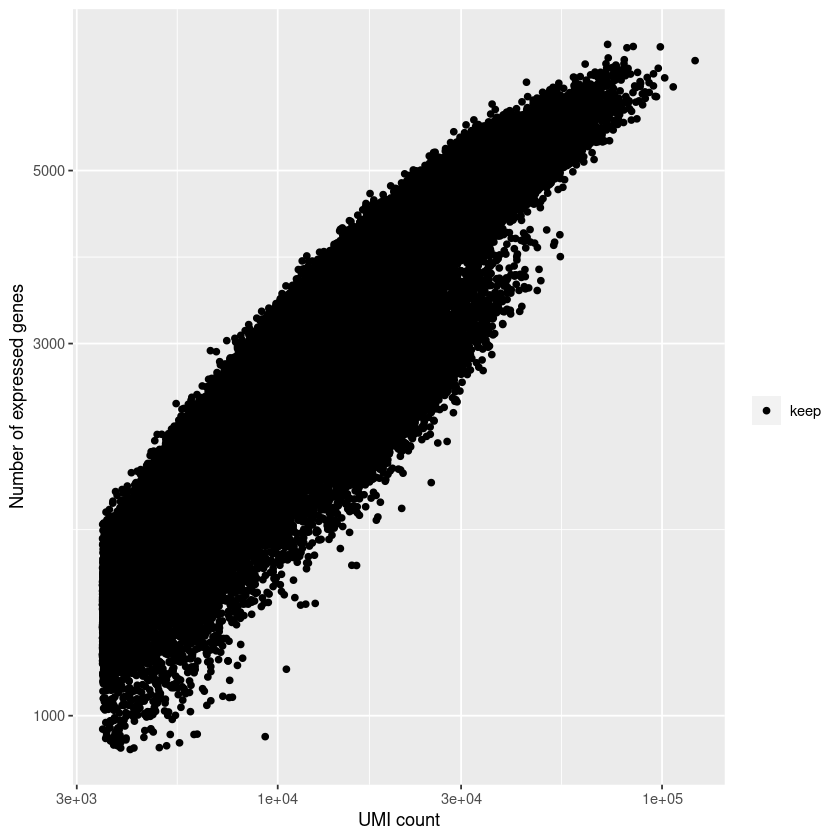

In [23]:
library(ggplot2)


qplot(lib.sizes, ngenes, col = ifelse(ngenes < 900, "drop", "keep")) +
  scale_x_log10() +
  scale_y_log10() +
  labs(x = "UMI count", y = "Number of expressed genes") +
  scale_color_manual(values = c("drop" = "grey50", "keep" = "black"), name = "")

summary(lib.sizes)
summary(ngenes)

In [60]:
median(ngenes[subset_meta$sample==1])
median(lib.sizes[subset_meta$sample==1])

[1] 3000

[1] 12689